In [ ]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from mislabelling import symmetric_noise
from testing import *
from sklearn.model_selection import train_test_split

# Initial Verification & Parameter Tuning Experiments
Experiments for verifying the effectiveness of the training scheme on the wine dataset and understanding the effects of different hyperparameters  

In [2]:
RESOLUTION = 20
TRIALS = 35
N_ESTIMATORS = 10
TEST_SIZE = 0.25
ITERATIONS = 10

FIG_SIZE = (5,4)
FONT_SIZE = 10
plt.rcParams["figure.figsize"] = FIG_SIZE  # width, height in inches

data = load_wine()

### Intial Verification
Run intial verification tests on the wine dataset with trials of:
- Standard variant
- Bootstrapping variant
- No relabelling
- No feature subsetting

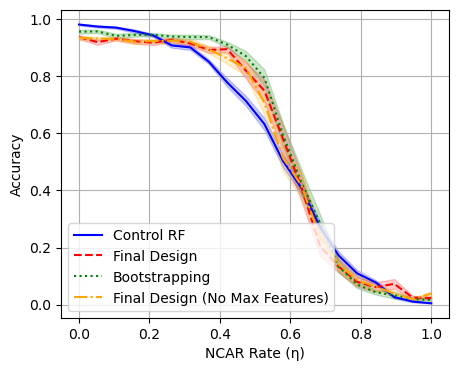

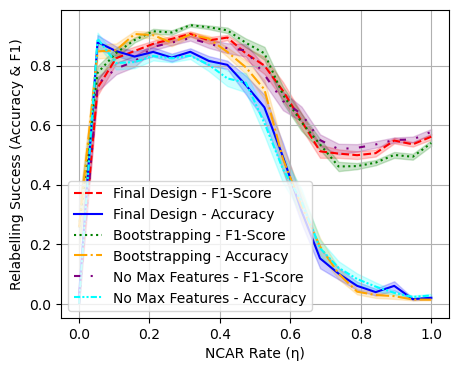

In [3]:
accuracies_all, auc_all, relabelling_f1_all, relabelling_acc_all, x_axis = run_noise_level_experiment(
    data, RandomForestClassifier, symmetric_noise,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS
)

accuracies_boot, auc_boot, relabelling_f1_boot, relabelling_acc_boot, _ = run_noise_level_experiment(
    data, RandomForestClassifier, symmetric_noise,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS,
    control=False, bootstrapping=True
)

accuracies_no_max, auc_no_max, relabelling_f1_no_max, relabelling_acc_no_max, _ = run_noise_level_experiment(
    data, RandomForestClassifier, symmetric_noise,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS,
    control=False, max_features = None
)

accuracies_all = np.concatenate([accuracies_all, accuracies_boot[:1]], axis=0)
auc_all = np.concatenate([auc_all, auc_boot[:1]], axis=0)
relabelling_f1_all = np.concatenate([relabelling_f1_all, relabelling_f1_boot[:1]], axis=0)
relabelling_acc_all = np.concatenate([relabelling_acc_all, relabelling_acc_boot[:1]], axis=0)

# Process results
accuracies_mean_base, accuracies_se_base = process_experiment_result(accuracies_all)
relabelling_f1_success_base, relabelling_f1_se_base = process_experiment_result(relabelling_f1_all)
relabelling_acc_success_base, relabelling_acc_se_base = process_experiment_result(relabelling_acc_all)

accuracies_mean_no_max, accuracies_se_no_max = process_experiment_result(accuracies_no_max)
relabelling_f1_success_no_max, relabelling_f1_se_no_max = process_experiment_result(relabelling_f1_no_max)
relabelling_acc_success_no_max, relabelling_acc_se_no_max = process_experiment_result(relabelling_acc_no_max)

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean_base[1], accuracies_se_base[1], label="Control RF", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean_base[0], accuracies_se_base[0], label="Final Design", color='red', linestyle='--')
plot_with_error_band(x_axis, accuracies_mean_base[2], accuracies_se_base[2], label="Bootstrapping", color='green', linestyle=':')
plot_with_error_band(x_axis, accuracies_mean_no_max[0], accuracies_se_no_max[0], label="Final Design (No Max Features)", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Accuracy")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

plot_with_error_band(x_axis, relabelling_f1_success_base[0], relabelling_f1_se_base[0], label="Final Design - F1-Score", color='red', linestyle='--')
plot_with_error_band(x_axis, relabelling_acc_success_base[0], relabelling_acc_se_base[0], label="Final Design - Accuracy", color='blue')
plot_with_error_band(x_axis, relabelling_f1_success_base[1], relabelling_f1_se_base[1], label="Bootstrapping - F1-Score", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success_base[1], relabelling_acc_se_base[1], label="Bootstrapping - Accuracy", color='orange', linestyle='-.')
plot_with_error_band(x_axis, relabelling_f1_success_no_max[0], relabelling_f1_se_no_max[0], label="No Max Features - F1-Score", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))
plot_with_error_band(x_axis, relabelling_acc_success_no_max[0], relabelling_acc_se_no_max[0], label="No Max Features - Accuracy", color='cyan', linestyle=(0, (3, 1, 1, 1, 1, 1)))

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Relabelling Success (Accuracy & F1)")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

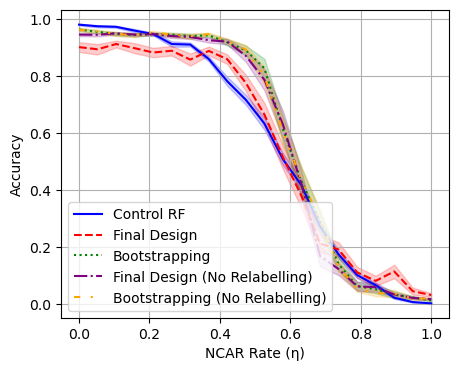

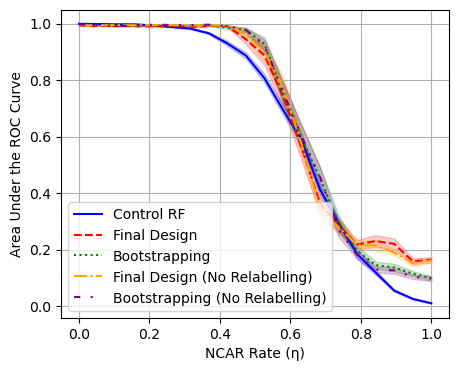

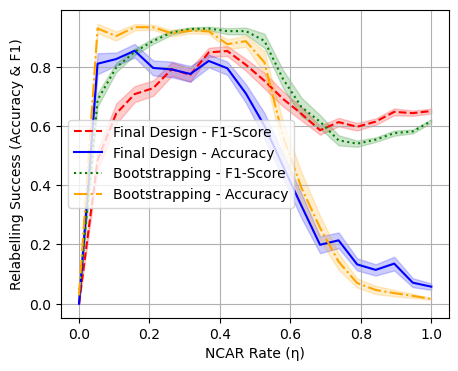

In [18]:
accuracies_all, auc_no_relabelling, relabelling_f1_all, relabelling_acc_all, x_axis = run_noise_level_experiment(
    data, RandomForestClassifier, symmetric_noise,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS,
    control=False, relabelling = False
)

accuracies_boot, auc_boot, relabelling_f1_boot, relabelling_acc_boot, x_axis = run_noise_level_experiment(
    data, RandomForestClassifier, symmetric_noise,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    resolution=RESOLUTION, test_size=TEST_SIZE, iterations=ITERATIONS,
    control=False, bootstrapping=True,
    relabelling = False
)

auc_all = np.concatenate([auc_all, auc_no_relabelling[:1]], axis=0)
auc_all = np.concatenate([auc_all, auc_boot[:1]], axis=0)
accuracies_all = np.concatenate([accuracies_all, accuracies_boot[:1]], axis=0)

accuracies_mean_no_relabelling, accuracies_se_no_relabelling = process_experiment_result(accuracies_all)
auc_mean, auc_se = process_experiment_result(auc_all)

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean_base[1], accuracies_se_base[1], label="Control RF", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean_base[0], accuracies_se_base[0], label="Final Design", color='red', linestyle='--')
plot_with_error_band(x_axis, accuracies_mean_base[2], accuracies_se_base[2], label="Bootstrapping", color='green', linestyle=':')
plot_with_error_band(x_axis, accuracies_mean_no_relabelling[0], accuracies_se_no_relabelling[0], label="Final Design (No Relabelling)", color='purple', linestyle='-.')
plot_with_error_band(x_axis, accuracies_mean_no_relabelling[-1], accuracies_se_no_relabelling[-1], label="Bootstrapping (No Relabelling)", color='orange', linestyle=(0, (3, 5, 1, 5, 1, 5)))

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Accuracy")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

# Accuracy lines
plot_with_error_band(x_axis, auc_mean[1], auc_se[1], label="Control RF", color='blue', linestyle='-')
plot_with_error_band(x_axis, auc_mean[0], auc_se[0], label="Final Design", color='red', linestyle='--')
plot_with_error_band(x_axis, auc_mean[2], auc_se[2], label="Bootstrapping", color='green', linestyle=':')
plot_with_error_band(x_axis, auc_mean[3], auc_se[3], label="Final Design (No Relabelling)", color='orange', linestyle='-.')
plot_with_error_band(x_axis, auc_mean[4], auc_se[4], label="Bootstrapping (No Relabelling)", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Area Under the ROC Curve")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

plot_with_error_band(x_axis, relabelling_f1_success_base[0], relabelling_f1_se_base[0], label="Final Design - F1-Score", color='red', linestyle='--')
plot_with_error_band(x_axis, relabelling_acc_success_base[0], relabelling_acc_se_base[0], label="Final Design - Accuracy", color='blue')
plot_with_error_band(x_axis, relabelling_f1_success_base[1], relabelling_f1_se_base[1], label="Bootstrapping - F1-Score", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success_base[1], relabelling_acc_se_base[1], label="Bootstrapping - Accuracy", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "NCAR Rate (η)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Relabelling Success (Accuracy & F1)")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

In [19]:
print(f"Control AUC Under no Noise: {auc_mean[1][0]:.3f}")
print(f"Initial Design (No Relabelling)(Bootstrapping) AUC Under no Noise: {auc_mean[-1][0]:.3f}")

Control AUC Under no Noise: 0.999
Initial Design (No Relabelling)(Bootstrapping) AUC Under no Noise: 0.997


### Effect of Iterations and n_estimators
Measure the effect of the iterations and n_estimators parameters by:
- Varying one while the other remains constant to product a graph
- Varying both at the same time to product a matrix

η with largest performance difference: 0.85
η with largest performance difference (bootstrapping): 0.50


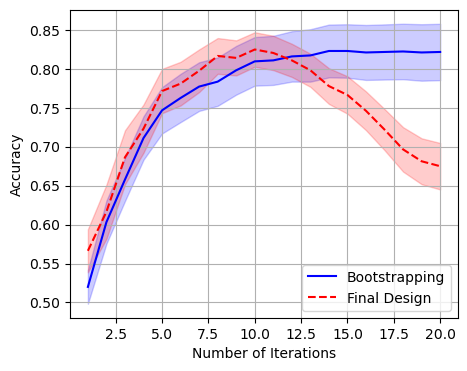

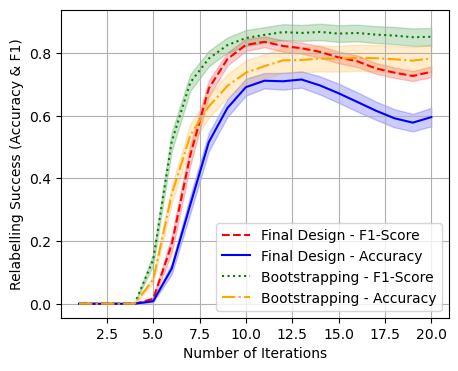

In [20]:
std_diff = np.argmax(accuracies_mean_base[0] - accuracies_mean_base[1])*0.05
boot_diff = np.argmax(accuracies_mean_base[2] - accuracies_mean_base[1])*0.05
print(f"η with largest performance difference: {std_diff:.2f}")
print(f"η with largest performance difference (bootstrapping): {boot_diff:.2f}")

accuracies_all, relabelling_f1_all, relabelling_acc_all, x_axis = run_iteration_sweep_experiment(
    data, RandomForestClassifier, symmetric_noise, boot_diff,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    test_size=TEST_SIZE, iterations=20
)

accuracies_boot, relabelling_f1_boot, relabelling_acc_boot, x_axis = run_iteration_sweep_experiment(
    data, RandomForestClassifier, symmetric_noise, boot_diff,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    test_size=TEST_SIZE, iterations=20,
    bootstrapping= True
)

accuracies_all = np.concatenate([accuracies_all, accuracies_boot[:1]], axis=0)
relabelling_f1_all = np.concatenate([relabelling_f1_all, relabelling_f1_boot[:1]], axis=0)
relabelling_acc_all = np.concatenate([relabelling_acc_all, relabelling_acc_boot[:1]], axis=0)

accuracies_mean, accuracies_se = process_experiment_result(accuracies_all)
relabelling_f1_success, relabelling_f1_se = process_experiment_result(relabelling_f1_all)
relabelling_acc_success, relabelling_acc_se = process_experiment_result(relabelling_acc_all)

# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean[1], accuracies_se[1], label="Bootstrapping", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Final Design", color='red', linestyle='--')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "Number of Iterations")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Accuracy")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

plot_with_error_band(x_axis, relabelling_f1_success[0], relabelling_f1_se[0], label="Final Design - F1-Score", color='red', linestyle='--')
plot_with_error_band(x_axis, relabelling_acc_success[0], relabelling_acc_se[0], label="Final Design - Accuracy", color='blue')
plot_with_error_band(x_axis, relabelling_f1_success[1], relabelling_f1_se[1], label="Bootstrapping - F1-Score", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success[1], relabelling_acc_se[1], label="Bootstrapping - Accuracy", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "Number of Iterations")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Relabelling Success (Accuracy & F1)")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

In [36]:
accuracies_all, auc_all, relabelling_f1_all, relabelling_acc_all, x_axis = run_parameter_sweep_experiment(
    data, RandomForestClassifier, symmetric_noise, param_name= 'n_estimators', param_values=list(range(1,16)),
    noise_rate=boot_diff, trials=TRIALS, control= False,
    test_size=TEST_SIZE, iterations=15
)

accuracies_boot, auc_all, relabelling_f1_boot, relabelling_acc_boot, x_axis = run_parameter_sweep_experiment(
    data, RandomForestClassifier, symmetric_noise, param_name= 'n_estimators', param_values=list(range(1,16)),
    noise_rate=boot_diff, trials=TRIALS, control = False,
    test_size=TEST_SIZE, iterations=15,
    bootstrapping= True
)

accuracies_all = np.concatenate([accuracies_all, accuracies_boot[:1]], axis=0)
relabelling_f1_all = np.concatenate([relabelling_f1_all, relabelling_f1_boot[:1]], axis=0)
relabelling_acc_all = np.concatenate([relabelling_acc_all, relabelling_acc_boot[:1]], axis=0)

accuracies_mean, accuracies_se = process_experiment_result(accuracies_all)
relabelling_f1_success, relabelling_f1_se = process_experiment_result(relabelling_f1_all)
relabelling_acc_success, relabelling_acc_se = process_experiment_result(relabelling_acc_all)

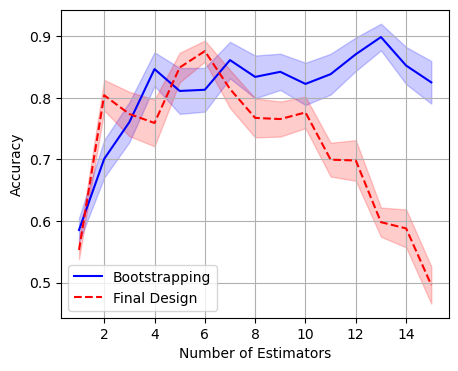

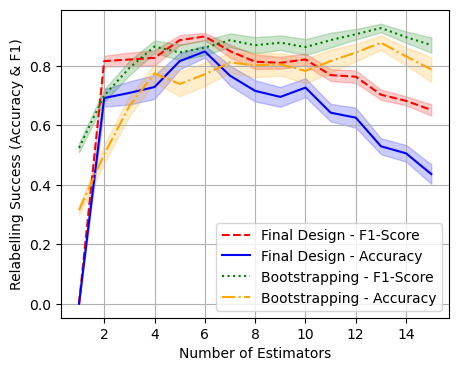

In [37]:
# Accuracy lines
plot_with_error_band(x_axis, accuracies_mean[2], accuracies_se[2], label="Bootstrapping", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Final Design", color='red', linestyle='--')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "Number of Estimators")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Accuracy")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

plot_with_error_band(x_axis, relabelling_f1_success[0], relabelling_f1_se[0], label="Final Design - F1-Score", color='red', linestyle='--')
plot_with_error_band(x_axis, relabelling_acc_success[0], relabelling_acc_se[0], label="Final Design - Accuracy", color='blue')
plot_with_error_band(x_axis, relabelling_f1_success[1], relabelling_f1_se[1], label="Bootstrapping - F1-Score", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success[1], relabelling_acc_se[1], label="Bootstrapping - Accuracy", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "Number of Estimators")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Relabelling Success (Accuracy & F1)")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

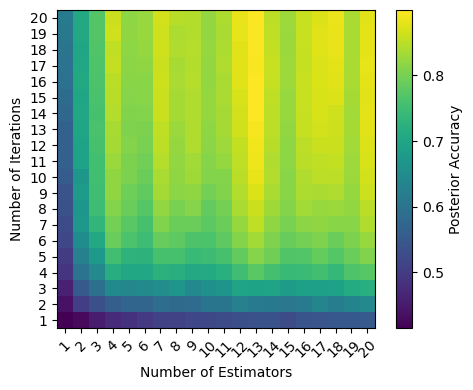

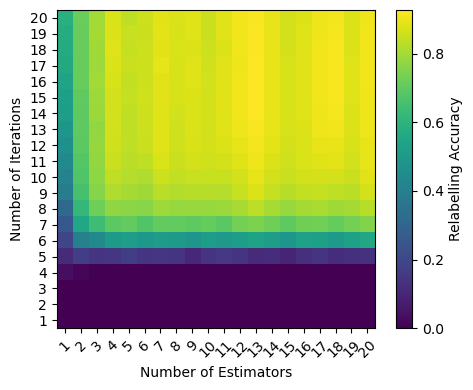

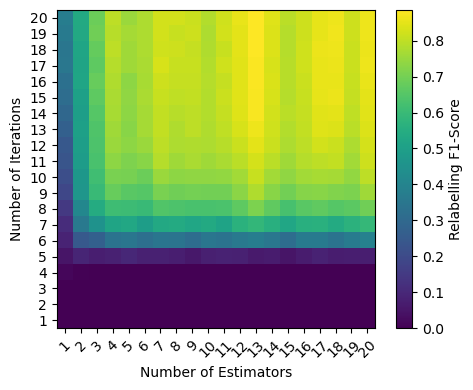

In [10]:
# Prepare 20x20 heatmaps for each metric
accuracy_heatmap = np.zeros((20, 20))
relabelling_acc_heatmap = np.zeros((20, 20))
relabelling_f1_heatmap = np.zeros((20, 20))

# Run experiment for each combination of (iterations, n_estimators)
for est_count in range(1, 21):
    accs, f1s, relabs, _ = run_iteration_sweep_experiment(
    data, RandomForestClassifier, symmetric_noise, boot_diff,
    n_estimators = est_count, trials=35,
    bootstrapping = True, test_size=TEST_SIZE, iterations=20
)

    for iter in range(0, 20):
        accuracy_heatmap[iter, est_count - 1] = np.mean(accs[0, iter, :])
        relabelling_acc_heatmap[iter, est_count - 1] = np.mean(f1s[0, iter, :])
        relabelling_f1_heatmap[iter, est_count - 1] = np.mean(relabs[0, iter,:])

plot_heatmap(accuracy_heatmap, list(range(1, 21)), list(range(1, 21)), 
             'Posterior Accuracy', 'Number of Estimators', 'Number of Iterations')

plot_heatmap(relabelling_acc_heatmap, list(range(1, 21)), list(range(1, 21)),
             'Relabelling Accuracy', 'Number of Estimators', 'Number of Iterations')

plot_heatmap(relabelling_f1_heatmap, list(range(1, 21)), list(range(1, 21)),
             'Relabelling F1-Score', 'Number of Estimators', 'Number of Iterations')

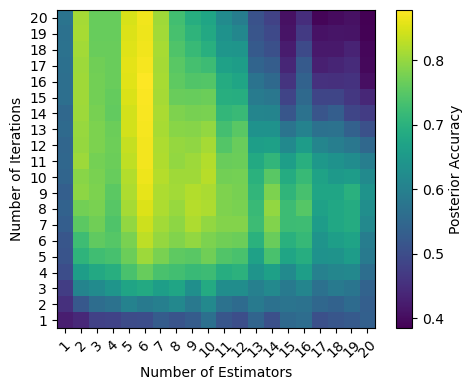

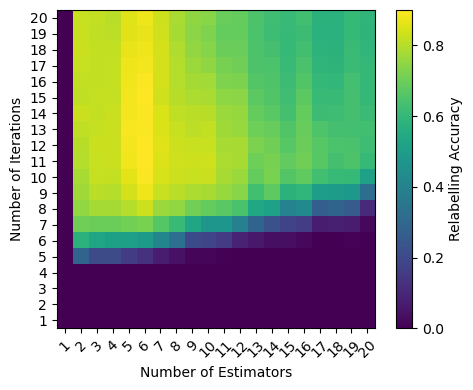

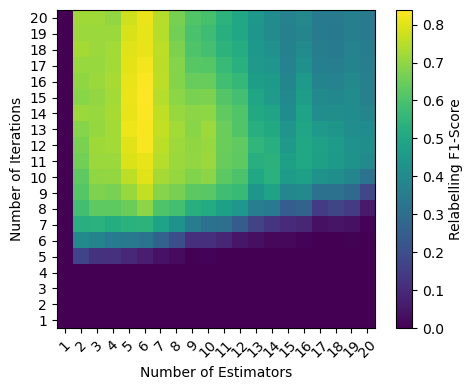

In [11]:
# Prepare 20x20 heatmaps for each metric
accuracy_heatmap = np.zeros((20, 20))
relabelling_acc_heatmap = np.zeros((20, 20))
relabelling_f1_heatmap = np.zeros((20, 20))

# Run experiment for each combination of (iterations, n_estimators)
for est_count in range(1, 21):
    accs, f1s, relabs, _ = run_iteration_sweep_experiment(
    data, RandomForestClassifier, symmetric_noise, boot_diff,
    n_estimators = est_count, trials=35,
    bootstrapping = False, test_size=TEST_SIZE, iterations=20
)

    for iter in range(0, 20):
        accuracy_heatmap[iter, est_count - 1] = np.mean(accs[0, iter, :])
        relabelling_acc_heatmap[iter, est_count - 1] = np.mean(f1s[0, iter, :])
        relabelling_f1_heatmap[iter, est_count - 1] = np.mean(relabs[0, iter,:])

plot_heatmap(accuracy_heatmap, list(range(1, 21)), list(range(1, 21)),
             'Posterior Accuracy', 'Number of Estimators', 'Number of Iterations')

plot_heatmap(relabelling_acc_heatmap, list(range(1, 21)), list(range(1, 21)),
             'Relabelling Accuracy', 'Number of Estimators', 'Number of Iterations')

plot_heatmap(relabelling_f1_heatmap, list(range(1, 21)), list(range(1, 21)),
             'Relabelling F1-Score', 'Number of Estimators', 'Number of Iterations')

### Measure Parameter Effect
Experiments to see the effect of, in order of experiment, Exclusion Parameter (κ) (plus an extra experiment to see κ's effect on size of thresholded training set), Learning Rate (λ) (two of differing resolutions), Activation Steepness (β), and Initial Certainty (δ)

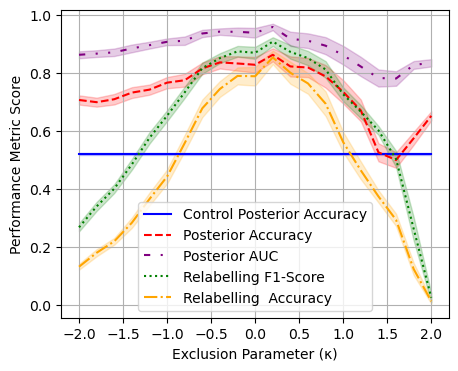

In [10]:
ITERATIONS = 15

acc, auc, relabelling_f1, relabelling_acc, x_axis = run_parameter_sweep_experiment(
    data, RandomForestClassifier, symmetric_noise, 'K', list(np.arange(-2, 2.2, 0.2)), 0.5,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    test_size=TEST_SIZE, iterations=ITERATIONS, bootstrapping=True
)

accuracies_mean, accuracies_se = process_experiment_result(acc)
auc_mean, auc_se = process_experiment_result(auc)
relabelling_f1_success, relabelling_f1_se = process_experiment_result(relabelling_f1)
relabelling_acc_success, relabelling_acc_se = process_experiment_result(relabelling_acc)

plot_with_error_band(x_axis, accuracies_mean[1], accuracies_se[1], label="Control Posterior Accuracy", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Posterior Accuracy", color='red', linestyle='--')
plot_with_error_band(x_axis, auc_mean[0], auc_se[0], label="Posterior AUC", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))
plot_with_error_band(x_axis, relabelling_f1_success[0], relabelling_f1_se[0], label="Relabelling F1-Score", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success[0], relabelling_acc_se[0], label="Relabelling  Accuracy", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "Exclusion Parameter (κ)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Performance Metric Score")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

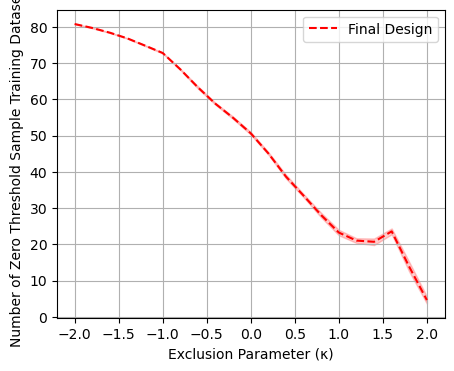

In [11]:
_, _, _, x_axis, no_samples = run_no_threshold_samples_experiment(
    data, RandomForestClassifier, symmetric_noise, 'K', list(np.arange(-2, 2.2, 0.2)), 0.5,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    test_size=TEST_SIZE, iterations=ITERATIONS, bootstrapping=True
)

no_samples_mean, no_samples_se = process_experiment_result(no_samples)

plot_with_error_band(x_axis, no_samples_mean[0], no_samples_se[0], label="Final Design", color='red', linestyle='--')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "Exclusion Parameter (κ)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Number of Zero Threshold Sample Training Datasets")
plt.legend()
plt.grid(True)
plt.show()

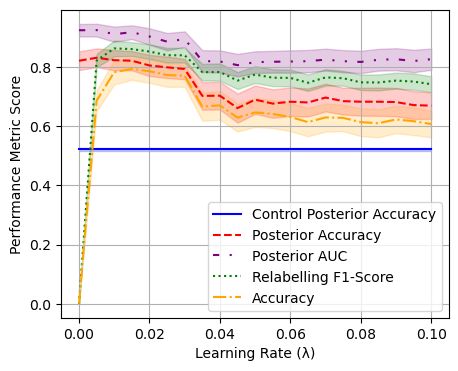

In [12]:
acc, auc, relabelling_f1, relabelling_acc, x_axis = run_parameter_sweep_experiment(
    data, RandomForestClassifier, symmetric_noise, 'L', list(np.arange(0, 0.105, 0.005)), 0.5,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    test_size=TEST_SIZE, iterations=ITERATIONS, bootstrapping=True
)

accuracies_mean, accuracies_se = process_experiment_result(acc)
auc_mean, auc_se = process_experiment_result(auc)
relabelling_f1_success, relabelling_f1_se = process_experiment_result(relabelling_f1)
relabelling_acc_success, relabelling_acc_se = process_experiment_result(relabelling_acc)

plot_with_error_band(x_axis, accuracies_mean[1], accuracies_se[1], label="Control Posterior Accuracy", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Posterior Accuracy", color='red', linestyle='--')
plot_with_error_band(x_axis, auc_mean[0], auc_se[0], label="Posterior AUC", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))
plot_with_error_band(x_axis, relabelling_f1_success[0], relabelling_f1_se[0], label="Relabelling F1-Score", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success[0], relabelling_acc_se[0], label="Accuracy", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "Learning Rate (λ)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Performance Metric Score")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

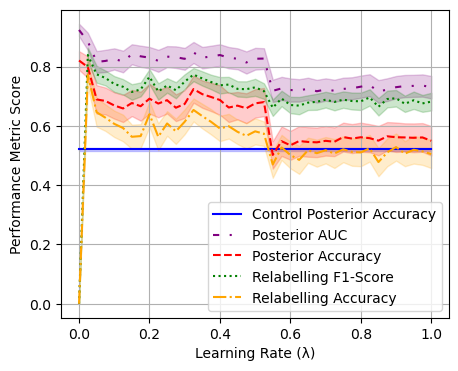

In [13]:
acc, auc, relabelling_f1, relabelling_acc, x_axis = run_parameter_sweep_experiment(
    data, RandomForestClassifier, symmetric_noise, 'L', list(np.arange(0, 1.025, 0.025)), 0.5,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    test_size=TEST_SIZE, iterations=ITERATIONS, bootstrapping=True
)

accuracies_mean, accuracies_se = process_experiment_result(acc)
auc_mean, auc_se = process_experiment_result(auc)
relabelling_f1_success, relabelling_f1_se = process_experiment_result(relabelling_f1)
relabelling_acc_success, relabelling_acc_se = process_experiment_result(relabelling_acc)

plot_with_error_band(x_axis, accuracies_mean[1], accuracies_se[1], label="Control Posterior Accuracy", color='blue', linestyle='-')
plot_with_error_band(x_axis, auc_mean[0], auc_se[0], label="Posterior AUC", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Posterior Accuracy", color='red', linestyle='--')
plot_with_error_band(x_axis, relabelling_f1_success[0], relabelling_f1_se[0], label="Relabelling F1-Score", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success[0], relabelling_acc_se[0], label="Relabelling Accuracy", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "Learning Rate (λ)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Performance Metric Score")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

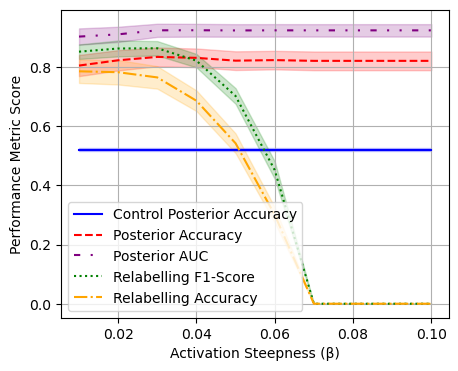

In [14]:
acc, auc, relabelling_f1, relabelling_acc, x_axis = run_parameter_sweep_experiment(
    data, RandomForestClassifier, symmetric_noise, 'B', list(np.arange(0.01, 0.11, 0.01)), 0.5,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    test_size=TEST_SIZE, iterations=ITERATIONS, bootstrapping=True
)

accuracies_mean, accuracies_se = process_experiment_result(acc)
auc_mean, auc_se = process_experiment_result(auc)
relabelling_f1_success, relabelling_f1_se = process_experiment_result(relabelling_f1)
relabelling_acc_success, relabelling_acc_se = process_experiment_result(relabelling_acc)

plot_with_error_band(x_axis, accuracies_mean[1], accuracies_se[1], label="Control Posterior Accuracy", color='blue', linestyle='-')
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Posterior Accuracy", color='red', linestyle='--')
plot_with_error_band(x_axis, auc_mean[0], auc_se[0], label="Posterior AUC", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))
plot_with_error_band(x_axis, relabelling_f1_success[0], relabelling_f1_se[0], label="Relabelling F1-Score", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success[0], relabelling_acc_se[0], label="Relabelling Accuracy", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "Activation Steepness (β)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Performance Metric Score")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

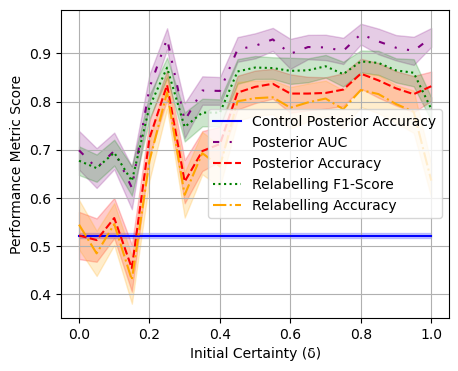

In [15]:
acc, auc, relabelling_f1, relabelling_acc, x_axis = run_parameter_sweep_experiment(
    data, RandomForestClassifier, symmetric_noise, 'initial_certainty', list(np.arange(0.0, 1.05, 0.05)), 0.5,
    n_estimators=N_ESTIMATORS, trials=TRIALS,
    test_size=TEST_SIZE, iterations=ITERATIONS, bootstrapping=True
)

accuracies_mean, accuracies_se = process_experiment_result(acc)
auc_mean, auc_se = process_experiment_result(auc)
relabelling_f1_success, relabelling_f1_se = process_experiment_result(relabelling_f1)
relabelling_acc_success, relabelling_acc_se = process_experiment_result(relabelling_acc)

plot_with_error_band(x_axis, accuracies_mean[1], accuracies_se[1], label="Control Posterior Accuracy", color='blue', linestyle='-')
plot_with_error_band(x_axis, auc_mean[0], auc_se[0], label="Posterior AUC", color='purple', linestyle=(0, (3, 5, 1, 5, 1, 5)))
plot_with_error_band(x_axis, accuracies_mean[0], accuracies_se[0], label="Posterior Accuracy", color='red', linestyle='--')
plot_with_error_band(x_axis, relabelling_f1_success[0], relabelling_f1_se[0], label="Relabelling F1-Score", color='green', linestyle=':')
plot_with_error_band(x_axis, relabelling_acc_success[0], relabelling_acc_se[0], label="Relabelling Accuracy", color='orange', linestyle='-.')

plt.xlabel(fontsize=FONT_SIZE, xlabel = "Initial Certainty (δ)")
plt.ylabel(fontsize=FONT_SIZE, ylabel = "Performance Metric Score")
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.legend()
plt.grid(True)
plt.show()

### Experiment to measure the variance due to feature selection
Measure the variance between trees trained on the same data with different subsets of features to determine why the bootstrapping method outperforms the standard slicing method

In [16]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=TEST_SIZE, stratify=data.target, random_state = SEED)

slice_size = int(len(X_train)/10)
X_train = X_train[0:slice_size]
y_train = y_train[0:slice_size]

dt = DecisionTreeClassifier(max_features='sqrt')
accuracy_all = [[] for _ in range(TRIALS)]
auc_all = [[] for _ in range(TRIALS)]

for trial in range(TRIALS):
    for estimator in range (10):
        dt.fit(X_train, y_train)
        y_score = dt.predict_proba(X_test)
        y_pred = dt.predict(X_test)
        accuracy_all[trial].append(metrics.accuracy_score(y_test, y_pred))
        auc_all[trial].append(metrics.roc_auc_score(y_test, y_score, multi_class='ovr', labels=np.unique(data.target)))

# Compute the range (max - min) for each trial
acc_ranges = [max(trial) - min(trial) for trial in accuracy_all]
auc_ranges = [max(trial) - min(trial) for trial in auc_all]

# Compute mean and standard deviation of the ranges
acc_range_mean = np.mean(acc_ranges)
acc_range_std = np.std(acc_ranges)

auc_range_mean = np.mean(auc_ranges)
auc_range_std = np.std(auc_ranges)

# Print results
print(f"Accuracy Range: {acc_range_mean:.3f} ± {acc_range_std:.3f}")
print(f"AUC Range:      {auc_range_mean:.3f} ± {auc_range_std:.3f}")

# Compute IQR per trial
acc_iqrs = [np.percentile(trial, 75) - np.percentile(trial, 25) for trial in accuracy_all]
auc_iqrs = [np.percentile(trial, 75) - np.percentile(trial, 25) for trial in auc_all]

# Compute mean and standard deviation of the IQRs
acc_iqr_mean = np.mean(acc_iqrs)
acc_iqr_std = np.std(acc_iqrs)

auc_iqr_mean = np.mean(auc_iqrs)
auc_iqr_std = np.std(auc_iqrs)

# Print results
print(f"Accuracy IQR: {acc_iqr_mean:.3f} ± {acc_iqr_std:.3f}")
print(f"AUC IQR:      {auc_iqr_mean:.3f} ± {auc_iqr_std:.3f}")

Accuracy Range: 0.275 ± 0.099
AUC Range:      0.205 ± 0.076
Accuracy IQR: 0.089 ± 0.043
AUC IQR:      0.071 ± 0.032
